In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
X_original = iris['data']
y_original = iris['target'] #.reshape(-1, 1)

print('X shape: ', X_original.shape)
print('y shape: ', y_original.shape)


X shape:  (150, 4)
y shape:  (150,)


In [4]:
X = X_original
y = keras.utils.to_categorical(y_original)

assert  y.shape == (150,3)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [6]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X=X_train)
X_test_s = scaler.fit_transform(X=X_test)


In [7]:
X_train_s.max()

3.209974403240013

In [8]:
print('X_train shape: ', X_train_s.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (120, 4)
y_train shape:  (120, 3)


In [9]:
# Build the model

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 523 (2.04 KB)

 Trainable params: 523 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Adam optimizer with learning rate of 0.001
adam_optimizer = Adam(learning_rate=0.001)

In [12]:
# Compile Model
model.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Fit Model

history = model.fit(x=X_train_s,
                    y=y_train,
                    batch_size=5,
                    epochs=200,
                    validation_split=0.1
                    )


Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4633 - loss: 1.0387 - val_accuracy: 0.5833 - val_loss: 0.9940
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5902 - loss: 0.8638 - val_accuracy: 0.5833 - val_loss: 0.9454
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.8168 - val_accuracy: 0.6667 - val_loss: 0.9017
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.7797 - val_accuracy: 0.6667 - val_loss: 0.8563
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.6872 - val_accuracy: 0.6667 - val_loss: 0.8188
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5940 - loss: 0.7468 - val_accuracy: 0.7500 - val_loss: 0.7923
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.6229 - val_accuracy: 0.7500 - val_loss: 0.7623
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7374 - loss: 0.5630 - val_accuracy: 0.7500 - 

In [14]:
# loss, accuracy = model.evaluate(X_test_s, y_test)
result = model.evaluate(X_test_s, y_test)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9667 - loss: 0.0496


[0.049566928297281265, 0.9666666388511658]

In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

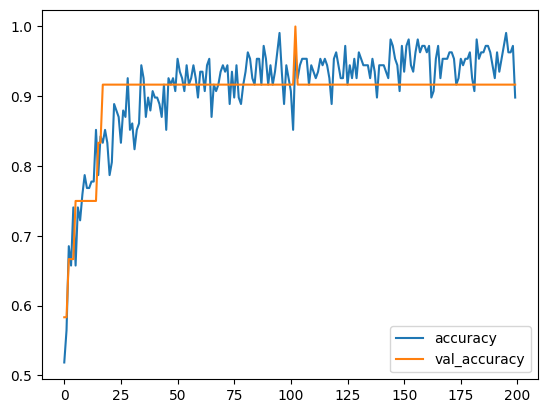

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

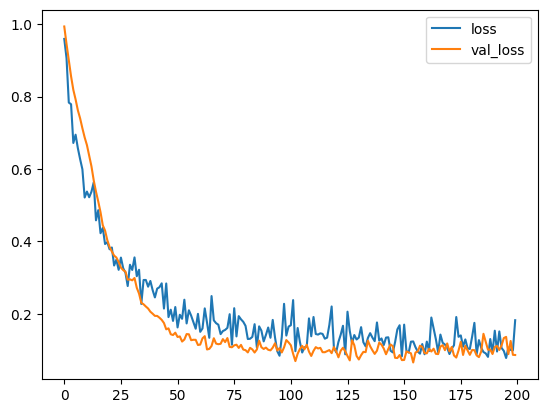

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])